In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:

!pip install -q keras

In [3]:
!rm * -r
!git clone https://github.com/prabhunithingollapudi007/SignLanguageTranslation.git

Cloning into 'SignLanguageTranslation'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [4]:
!cd SignLanguageTranslation/
!ls

SignLanguageTranslation


In [5]:
!unzip SignLanguageTranslation/train.zip

Archive:  SignLanguageTranslation/train.zip
   creating: train/
   creating: train/Eights/
  inflating: train/Eights/sample1.jpg  
  inflating: train/Eights/sample10.jpg  
  inflating: train/Eights/sample2.jpg  
  inflating: train/Eights/sample3.jpg  
  inflating: train/Eights/sample4.jpg  
  inflating: train/Eights/sample5.jpg  
  inflating: train/Eights/sample6.jpg  
  inflating: train/Eights/sample7.jpg  
  inflating: train/Eights/sample8.jpg  
  inflating: train/Eights/sample9.jpg  
   creating: train/Fives/
  inflating: train/Fives/sample1.jpg  
  inflating: train/Fives/sample10.jpg  
  inflating: train/Fives/sample2.jpg  
  inflating: train/Fives/sample3.jpg  
  inflating: train/Fives/sample4.jpg  
  inflating: train/Fives/sample5.jpg  
  inflating: train/Fives/sample6.jpg  
  inflating: train/Fives/sample7.jpg  
  inflating: train/Fives/sample8.jpg  
  inflating: train/Fives/sample9.jpg  
   creating: train/Fours/
  inflating: train/Fours/sample1.jpg  
  inflating: train/Fours/s

In [6]:
!ls

SignLanguageTranslation  train


In [7]:
!ls train/

Eights	Fives  Fours  Nines  Ones  Sevens  Sixes  Threes  Twos


In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

In [0]:
from glob import glob

from sklearn.model_selection import train_test_split


ones = glob('train/Ones/*.jpg')
twos = glob('train/Twos/*.jpg')
threes = glob('train/Threes/*.jpg')
fours = glob('train/Fours/*.jpg')
fives = glob('train/Fives/*.jpg')
sixes = glob('train/Sixes/*.jpg')
sevens = glob('train/Sevens/*.jpg')
eights = glob('train/Eights/*.jpg')
nines = glob('train/Nines/*.jpg')

In [0]:
ones_train, ones_test = train_test_split(ones, test_size=0.2)
twos_train, twos_test = train_test_split(twos, test_size=0.2)
threes_train, threes_test = train_test_split(threes, test_size=0.2)

fours_train, fours_test = train_test_split(fours, test_size=0.2)
fives_train, fives_test = train_test_split(fives, test_size=0.2)
sixes_train, sixes_test = train_test_split(sixes, test_size=0.2)

sevens_train, sevens_test = train_test_split(sevens, test_size=0.2)
eights_train, eights_test = train_test_split(eights, test_size=0.2)
nines_train, nines_test = train_test_split(nines, test_size=0.2)

In [11]:
print(nines_train)

['train/Nines/sample2.jpg', 'train/Nines/sample10.jpg', 'train/Nines/sample4.jpg', 'train/Nines/sample1.jpg', 'train/Nines/sample9.jpg', 'train/Nines/sample6.jpg', 'train/Nines/sample5.jpg', 'train/Nines/sample3.jpg']


In [0]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/One
files = ' '.join(ones_test)
!mv -t test/One $files

!mkdir test/Two
files = ' '.join(twos_test)
!mv -t test/Two $files

!mkdir test/Three
files = ' '.join(threes_test)
!mv -t test/Three $files

!mkdir test/Four
files = ' '.join(fours_test)
!mv -t test/Four $files

!mkdir test/Five
files = ' '.join(fives_test)
!mv -t test/Five $files

!mkdir test/Six
files = ' '.join(sixes_test)
!mv -t test/Six $files

!mkdir test/Seven
files = ' '.join(sevens_test)
!mv -t test/Seven $files

!mkdir test/Eight
files = ' '.join(eights_test)
!mv -t test/Eight $files

!mkdir test/Nine
files = ' '.join(nines_test)
!mv -t test/Nine $files

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


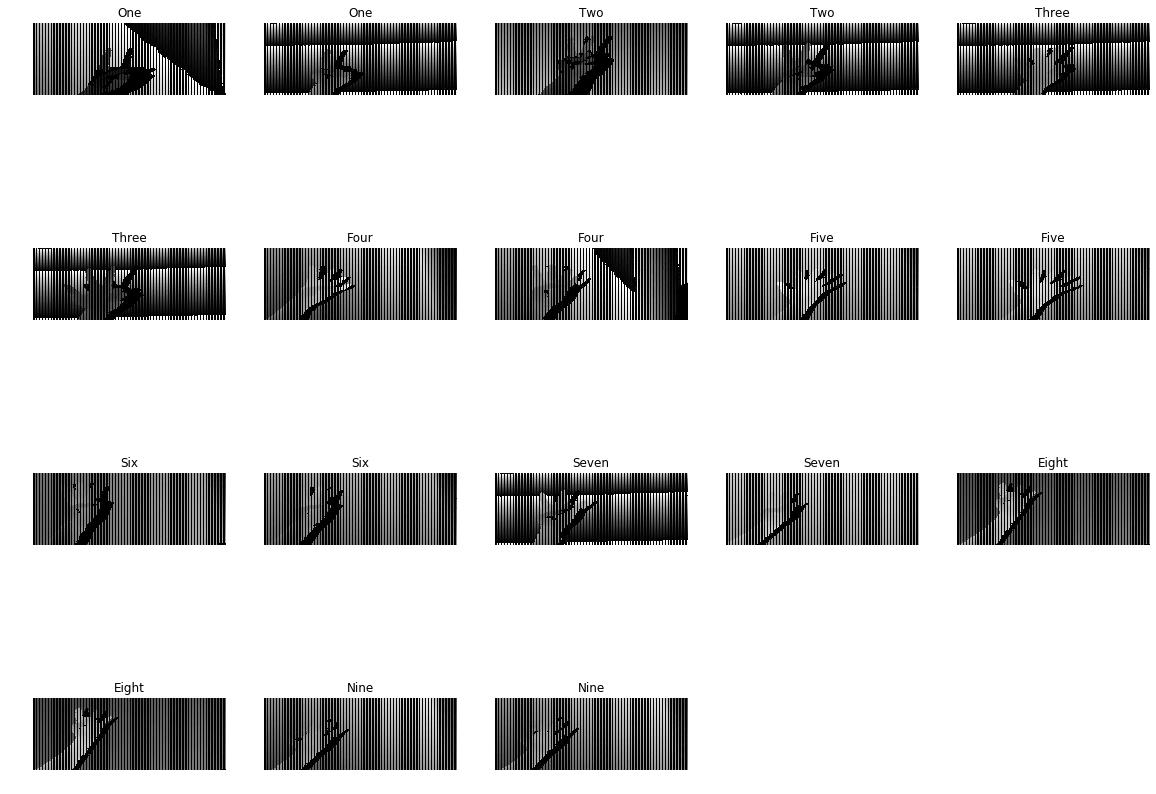

In [14]:
ones = np.random.choice(ones_train, 2)
twos = np.random.choice(twos_train, 2)
threes = np.random.choice(threes_train, 2)

fours = np.random.choice(fours_train, 2)
fives = np.random.choice(fives_train, 2)
sixes = np.random.choice(sixes_train, 2)

sevens = np.random.choice(sevens_train, 2)
eights = np.random.choice(eights_train, 2)
nines = np.random.choice(nines_train, 2)

data = np.concatenate((ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
labels = 2 * ['One'] + 2 *['Two'] + 2 *['Three'] + 2 *['Four'] + 2 *['Five'] + 2 *['Six'] + 2 *['Seven'] + 2 *['Eight'] + 2 *['Nine']

N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [15]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 9
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.







87916544/87910968 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 640
HEIGHT = 240
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 72 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


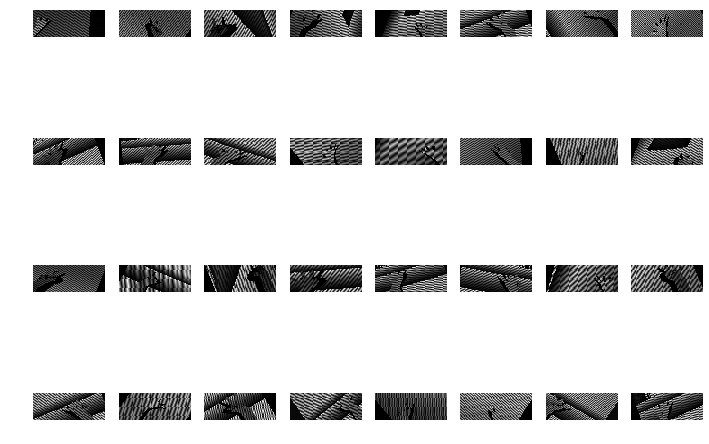

In [17]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [18]:
EPOCHS = 5
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
320/320 [==============================] - 393s 1s/step - loss: 2.1090 - acc: 0.2140 - val_loss: 2.2249 - val_acc: 0.2040
Epoch 2/5
320/320 [==============================] - 376s 1s/step - loss: 1.8378 - acc: 0.3560 - val_loss: 2.4847 - val_acc: 0.1406
Epoch 3/5
320/320 [==============================] - 376s 1s/step - loss: 1.7157 - acc: 0.3934 - val_loss: 2.3374 - val_acc: 0.2092
Epoch 4/5
320/320 [==============================] - 369s 1s/step - loss: 1.6352 - acc: 0.4283 - val_loss: 2.2477 - val_acc: 0.2543
Epoch 5/5
320/320 [==============================] - 363s 1s/step - loss: 1.5779 - acc: 0.4531 - val_loss: 2.5427 - val_acc: 0.2066


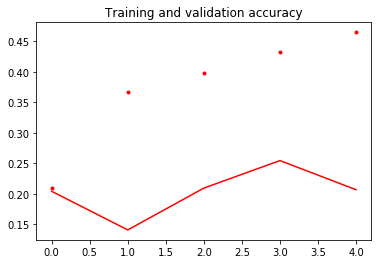

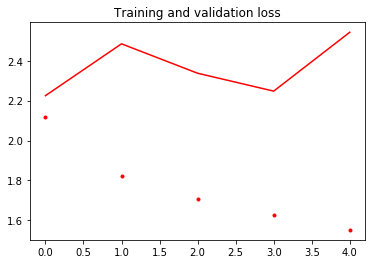

In [25]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("one", "two")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [0]:
model = load_model(MODEL_FILE)

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [29]:
!ls test/Two

sample6.jpg  sample9.jpg


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
img = image.load_img('test/Two/sample9.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)


In [39]:
print(preds)

[0.01517005 0.08428766 0.02125658 0.00490104 0.04795427 0.64697284
 0.0317386  0.09565829 0.05206072]


In [0]:
outputs_test = model.predict_generator(validation_generator)

In [51]:
print(outputs_test)

[[0.01723489 0.24847196 0.04768883 0.03130022 0.00805323 0.41613925
  0.05887156 0.10012805 0.0721121 ]
 [0.01009912 0.0821382  0.0470467  0.03466063 0.01813618 0.5538238
  0.0751142  0.1327214  0.04625975]
 [0.00587231 0.12310258 0.04262596 0.04277133 0.00262469 0.64468175
  0.05903857 0.07040121 0.00888153]
 [0.01615763 0.02393292 0.0597187  0.01953918 0.01609104 0.06787569
  0.40027243 0.29908943 0.09732299]
 [0.00160795 0.11075117 0.03487055 0.03438038 0.00738925 0.6625366
  0.05067146 0.08336341 0.01442928]
 [0.0060294  0.12855138 0.0047734  0.01246535 0.02699846 0.49497133
  0.0257432  0.27773958 0.02272787]
 [0.0717421  0.06657396 0.02850005 0.04826027 0.0113414  0.343798
  0.22884025 0.08689872 0.11404531]
 [0.00613421 0.3437947  0.04159438 0.17151116 0.00108689 0.26953787
  0.10879789 0.05286198 0.00468101]
 [0.0293882  0.04338757 0.00507397 0.00615084 0.03711928 0.5204535
  0.02536912 0.2372651  0.09579248]
 [0.00631172 0.10100734 0.01877722 0.05533363 0.00407657 0.5998295
  

In [0]:
import numpy

In [73]:
predictions = []
for array in outputs_test:
  temp = [x for x in array]
  max_value = max(temp)
  print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

max value:0.416139, 6
max value:0.553824, 6
max value:0.644682, 6
max value:0.400272, 7
max value:0.662537, 6
max value:0.494971, 6
max value:0.343798, 6
max value:0.343795, 2
max value:0.520454, 6
max value:0.599829, 6
max value:0.349866, 6
max value:0.241625, 6
max value:0.693674, 6
max value:0.253471, 2
max value:0.674554, 2
max value:0.403951, 6
max value:0.478510, 6
max value:0.364078, 6


In [0]:
true_values = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [76]:
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0]])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.14      1.00      0.25         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.11        18
   macro avg       0.02      0.11      0.03        18
weighted avg       0.02      0.11      0.03        18



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
